### Kaggle Link

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('../Data/Kaggle/toxic_train.csv')
test_df  = pd.read_csv('../Data/Kaggle/toxic_test.csv')

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Pre-Processing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemma = WordNetLemmatizer()

In [6]:
from autocorrect import spell

In [7]:
for df in [train_df, test_df]:
    df['comment_text'] = df['comment_text'].apply(lambda x: word_tokenize(str(x)))
    df['comment_text'] = df['comment_text'].apply(lambda x: [lemma.lemmatize(word) for word in x])
    df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(x))

### Feature Engineering 

In [8]:
import re

for df in [train_df, test_df]:
    df['len'] = df['comment_text'].apply(lambda x: len(str(x)))
    df['num_numbers'] = df['comment_text'].apply(lambda x: len(re.sub(r'\D+', '', str(x))))
    df['num_non-word'] = df['comment_text'].apply(lambda x: len(re.sub(r'\w+', '', str(x))))    
    df['num_capitals'] = df['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
    df['caps_vs_len'] = df.apply(lambda row: 0 if row['len'] == 0 else float(row['num_capitals'])/float(row['len']),  axis=1)
    df['num_exclamation_marks'] = df['comment_text'].apply(lambda x: x.count('!'))
    df['num_question_marks'] = df['comment_text'].apply(lambda x: x.count('?'))
    df['num_punctuation'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
    df['num_symbols'] = df['comment_text'].apply(lambda x: sum(x.count(w) for w in '*&$%#'))
    df['num_words'] = df['comment_text'].apply(lambda x: len(x.split()))
    df['num_unique_words'] = df['comment_text'].apply(lambda x: len(set(w for w in x.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']

In [9]:
new_features = ['len', 'num_numbers', 'num_non-word', 'num_capitals', 'caps_vs_len', 
                'num_exclamation_marks', 'num_question_marks', 'num_punctuation', 
                'num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique']

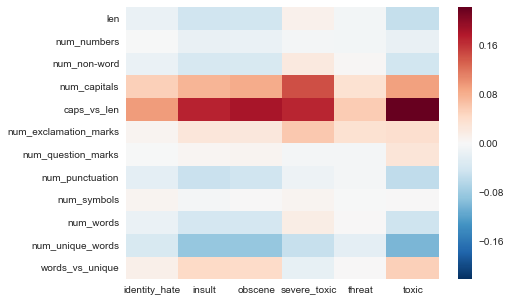

In [10]:
plt.figure(figsize=(7,5))
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

rows = [{c:train_df[f].corr(train_df[c]) for c in columns} for f in new_features]
df_correlations = pd.DataFrame(rows, index=new_features)

sns.heatmap(df_correlations)

In [11]:
train_df[new_features] = train_df[new_features].fillna(0)
test_df[new_features] = test_df[new_features].fillna(0)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df.loc[:, new_features] = scaler.fit_transform(train_df[new_features])
test_df.loc[:, new_features]  = scaler.transform(test_df[new_features])

In [13]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0,-0.220846,0.335426,-0.258955,-0.001654,0.144424,-0.025546,0.346388,-0.154587,-0.122056,-0.259355,-0.106586,0.745514
1,000103f0d9cfb60f,D'aww ! He match this background colour I 'm s...,0,0,0,0,0,0,-0.469385,0.394302,-0.389186,-0.094891,0.189114,0.013065,-0.282584,-0.232894,-0.122056,-0.441521,-0.517732,0.449312
2,000113f07ec002fd,"Hey man , I 'm really not trying to edit war ....",0,0,0,0,0,0,-0.270554,-0.194455,-0.291513,-0.136330,-0.370814,-0.025546,-0.282584,-0.311200,-0.122056,-0.267636,-0.126165,0.731857
3,0001b41b1c6bb37e,`` More I ca n't make any real suggestion on i...,0,0,0,0,0,0,0.377306,-0.194455,0.353131,-0.063812,-0.362786,-0.025546,-0.282584,-0.154587,0.659476,0.394784,0.794019,-0.506134
4,0001d958c54c6e35,"You , sir , are my hero . Any chance you remem...",0,0,0,0,0,0,-0.547261,-0.194455,-0.493371,-0.157049,-0.248368,-0.025546,0.346388,-0.389507,-0.122056,-0.516043,-0.635202,1.044143


In [14]:
test_df.head()

,id,comment_text,len,num_numbers,num_non-word,num_capitals,caps_vs_len,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you 'l...,-0.055153,-0.194455,-0.037562,-0.136330,-0.436202,-0.025546,-0.282584,0.236945,-0.122056,0.005612,0.324138,0.211380
1,0000247867823ef7,"== From RfC == The title is fine a it is , IMO .",-0.587027,-0.194455,-0.512906,-0.105251,1.060842,-0.025546,-0.282584,-0.467814,-0.122056,-0.549164,-0.733094,0.483303
2,00013b17ad220c46,`` == Sources == * Zawe Ashton on Lapland — / ``,-0.587027,-0.194455,-0.493371,-0.136330,0.367731,-0.025546,-0.282584,-0.624427,0.659476,-0.565724,-0.772251,0.330346
3,00017563c3f7919a,": If you have a look back at the source , the ...",-0.318605,-0.194455,-0.317559,-0.136330,-0.345183,-0.025546,-0.282584,-0.232894,-0.122056,-0.300757,-0.341527,-0.351005
4,00017695ad8997eb,I do n't anonymously edit article at all .,-0.596969,-0.194455,-0.571510,-0.167409,-0.292375,-0.025546,-0.282584,-0.546120,-0.122056,-0.590565,-0.791829,1.401041


### Modeling

In [15]:
features = train_df.columns.difference(columns)
train_df["comment_text"].fillna(" ", inplace=True)
test_df["comment_text"].fillna(" ", inplace=True)

x_train = train_df[features].drop('id', axis=1)
x_test  = test_df[features].drop('id', axis=1)
y_train = train_df[columns]

In [16]:
x_train.head()

,caps_vs_len,comment_text,len,num_capitals,num_exclamation_marks,num_non-word,num_numbers,num_punctuation,num_question_marks,num_symbols,num_unique_words,num_words,words_vs_unique
0,0.144424,Explanation Why the edits made under my userna...,-0.220846,-0.001654,-0.025546,-0.258955,0.335426,-0.154587,0.346388,-0.122056,-0.106586,-0.259355,0.745514
1,0.189114,D'aww ! He match this background colour I 'm s...,-0.469385,-0.094891,0.013065,-0.389186,0.394302,-0.232894,-0.282584,-0.122056,-0.517732,-0.441521,0.449312
2,-0.370814,"Hey man , I 'm really not trying to edit war ....",-0.270554,-0.136330,-0.025546,-0.291513,-0.194455,-0.311200,-0.282584,-0.122056,-0.126165,-0.267636,0.731857
3,-0.362786,`` More I ca n't make any real suggestion on i...,0.377306,-0.063812,-0.025546,0.353131,-0.194455,-0.154587,-0.282584,0.659476,0.794019,0.394784,-0.506134
4,-0.248368,"You , sir , are my hero . Any chance you remem...",-0.547261,-0.157049,-0.025546,-0.493371,-0.194455,-0.389507,0.346388,-0.122056,-0.635202,-0.516043,1.044143


In [17]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


#### Embeddings

In [18]:
from tqdm import tqdm

In [19]:
# load the vectors in a dictionary:
import gensim.models.keyedvectors as word2vec

def load_embeddings(path, embedding, split=" ", encoding='utf8'):
    embeddings_index = {}
    
    if(embedding=="glove" or embedding=="fasttext" ):
        f = open(path, encoding=encoding)
        for line in tqdm(f):
            print(line)
            break
            values = line.split(split)
            word = values[0]
            try:
                coefs = np.asarray(values[1:], dtype='float32')
            except:
                continue
            embeddings_index[word] = coefs
        f.close() 
    else:
        word2vecDict = word2vec.KeyedVectors.load_word2vec_format(path, binary=True)
        for word in tqdm(word2vecDict.wv.vocab):
            embeddings_index[word] = word2vecDict.word_vec(word)
               
    print('Found %s word vectors.' % len(embeddings_index))

    return embeddings_index

C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\paula.ceccon.ribeiro\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s, embeddings_index):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [21]:
def embedding_matrix(embeddings_index):
    word_index = tokenizer.word_index

    # create an embedding matrix for the words we have in the dataset
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in tqdm(word_index.items()):
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

#### Deep Learning

In [22]:
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Activation
from keras.layers import Flatten, Dropout, GlobalMaxPool1D, SpatialDropout1D
from keras.layers import LSTM, Bidirectional, GRU, CuDNNGRU, concatenate
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, Callback
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
import keras.backend as K

In [23]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [24]:
x_train['comment_text'].str.len().mean()

402.2861798196414

In [25]:
x_test['comment_text'].str.len().mean()

370.91567861899665

In [26]:
max_features = 50000
maxlen = 300

In [27]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train['comment_text']))

X_train = tokenizer.texts_to_sequences(x_train['comment_text'])
X_test  = tokenizer.texts_to_sequences(x_test['comment_text'])
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = sequence.pad_sequences(X_test,  maxlen=maxlen)

Model based on:
https://github.com/PavelOstyakov/toxic/blob/master/toxic/model.py

In [28]:
selected_features = ['caps_vs_len', 
                     'num_exclamation_marks', 
                     'num_punctuation', 
                     'num_unique_words']

In [29]:
def get_keras_data(dataset, df_features):
    
    X = {
        'comment_input' : dataset,
        'features_input' : df_features[selected_features]
    }
    
    return X

X_train_ = get_keras_data(X_train, x_train)
X_test_  = get_keras_data(X_test, x_test)

In [30]:
def get_model(embedding_matrix, sequence_length, dropout_rate, recurrent_units, dense_size):
    comment_input = Input(shape=(sequence_length,), name='comment_input')
    features_input = Input(shape=[X_train_['features_input'].shape[1]], name='features_input')
    
    embedding_layer = Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1],
                                weights=[embedding_matrix], trainable=False)(comment_input)
    
    bidirecti_layer = Bidirectional(CuDNNGRU(recurrent_units, return_sequences=True))(embedding_layer)
    bidirecti_layer = Dropout(dropout_rate)(bidirecti_layer)
    bidirecti_layer = Bidirectional(CuDNNGRU(recurrent_units, return_sequences=False))(bidirecti_layer)
    bidirecti_layer = Dense(dense_size, activation="relu")(bidirecti_layer)
    bidirecti_layer = BatchNormalization()(bidirecti_layer)
    
    main_layer = concatenate([
        bidirecti_layer,
        features_input
    ])
    
    main_layer = BatchNormalization()(main_layer)
    main_layer = Dense(64, activation="relu")(main_layer)
    main_layer = Dropout(dropout_rate)(main_layer)
    main_layer = Dense(32, activation="relu")(main_layer)
    main_layer = Dropout(dropout_rate)(main_layer)
    output_layer = Dense(6, activation="sigmoid")(main_layer)

    model = Model([comment_input, features_input], outputs=output_layer)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
epochs = 20

##### GloVe
https://nlp.stanford.edu/projects/glove/

In [33]:
glove_path = 'Embeddings/glove.840B.300d.txt'
glove_embeddings_index = load_embeddings(glove_path)

2196017it [03:18, 11052.39it/s]


Found 2196016 word vectors.


In [34]:
glove_embedding_matrix = embedding_matrix(glove_embeddings_index)

100%|██████████████████████████████████████████████████████████████████████| 190542/190542 [00:00<00:00, 412522.55it/s]


In [35]:
glove_embedding_matrix.shape

(190543, 300)

In [36]:
model = get_model(glove_embedding_matrix, maxlen, 0.3, 128, 32)

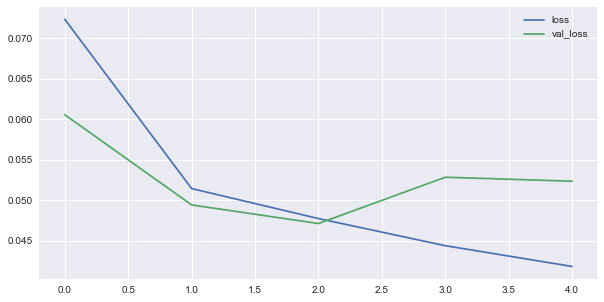

 - 827s - loss: 0.0418 - acc: 0.9835 - val_loss: 0.0523 - val_acc: 0.9826


In [37]:
model.fit(X_train_, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [38]:
y_pred = model.predict(X_test_)

In [39]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('glove.csv', index=False)

Score: 0.9493 

##### FastText
https://github.com/facebookresearch/fastText/blob/master/docs/english-vectors.md

In [32]:
import gc

for i in range(10):
    gc.collect()
    K.clear_session()

In [33]:
fast_path = 'Embeddings/wiki.simple.vec'
fast_embeddings_index = load_embeddings(fast_path, skiplines=1, split=",")

111051it [00:01, 87102.97it/s]


Found 110938 word vectors.


In [34]:
fast_embedding_matrix = embedding_matrix(fast_embeddings_index)

100%|█████████████████████████████████████████████████████████████████████| 190542/190542 [00:00<00:00, 1773737.37it/s]


In [35]:
fast_embedding_matrix.shape

(190543, 300)

In [36]:
model = get_model(fast_embedding_matrix, maxlen, 0.4, 128, 32)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
comment_input (InputLayer)      (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     57162900    comment_input[0][0]              
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 256)     330240      embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 300, 256)     0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
bidirectio

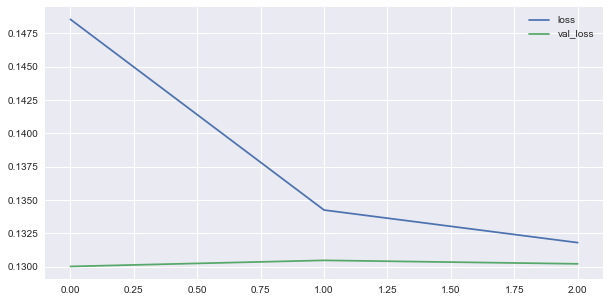

 - 824s - loss: 0.1318 - acc: 0.9636 - val_loss: 0.1302 - val_acc: 0.9641


In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
epochs = 20

model.fit(X_train_, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [38]:
y_pred = model.predict(X_test_)

In [39]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('fasttext.csv', index=False)

Score: 0.7498

##### word2vec

https://code.google.com/archive/p/word2vec/

In [32]:
import gc

for i in range(10):
    gc.collect()
    K.clear_session()

In [33]:
word2vec_path = 'Embeddings/GoogleNews-vectors-negative300.bin'
word2vec_embeddings_index = load_embeddings(word2vec_path, embedding='word2vec', encoding='ISO-8859-1')

100%|████████████████████████████████████████████████████████████████████| 3000000/3000000 [00:03<00:00, 778580.84it/s]


Found 3000000 word vectors.


In [34]:
word2vec_embedding_matrix = embedding_matrix(word2vec_embeddings_index)

100%|██████████████████████████████████████████████████████████████████████| 190542/190542 [00:00<00:00, 523462.46it/s]


In [35]:
word2vec_embedding_matrix.shape

(190543, 300)

In [36]:
model = get_model(word2vec_embedding_matrix, maxlen, 0.3, 128, 32)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
comment_input (InputLayer)      (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     57162900    comment_input[0][0]              
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 256)     330240      embedding_1[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 300, 256)     0           bidirectional_1[0][0]            
__________________________________________________________________________________________________
bidirectio

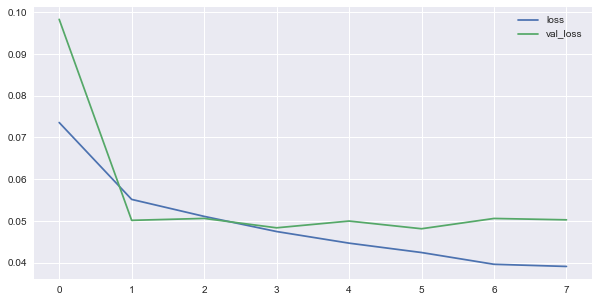

 - 831s - loss: 0.0391 - acc: 0.9848 - val_loss: 0.0503 - val_acc: 0.9825


In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
epochs = 20

model.fit(X_train_, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [38]:
y_pred = model.predict(X_test_)

In [39]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('word2vec.csv', index=False)

Score: 0.9709

##### Going Simple

In [29]:
comment_input = Input((maxlen,))
comment_emb = Embedding(max_features, 64, input_length=maxlen)(comment_input)

# we add a GlobalMaxPool1D, which will extract information from the embeddings
# of all words in the document
comment_emb = SpatialDropout1D(0.25)(comment_emb)
max_emb = GlobalMaxPool1D()(comment_emb)

# normalized dense layer followed by dropout
main = BatchNormalization()(max_emb)
main = Dense(64)(main)
main = Dropout(0.5)(main)

output = Dense(6, activation='sigmoid')(main)

model = Model(inputs=comment_input, outputs=output)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

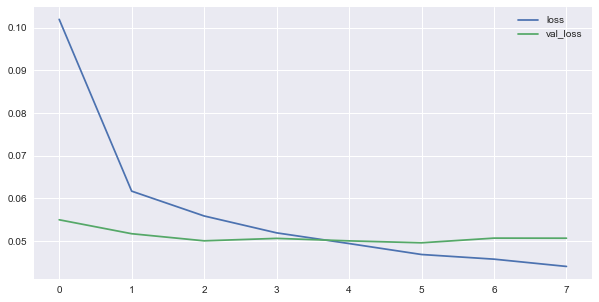

 - 85s - loss: 0.0441 - acc: 0.9839 - val_loss: 0.0507 - val_acc: 0.9820


In [32]:
model.fit(X_train, y_train.values, epochs=epochs, verbose=2, validation_split=0.3, callbacks=[plot_losses, early_stopping])

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_df = pd.DataFrame(y_pred, columns=columns)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('simple_dnn.csv', index=False)

Score: 0.9726